In [1]:
#Importing the python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv(r'C:\Users\Olowoselu\Desktop\Kehinde\netflix_titles.csv')

In [3]:
#shows the first 5 entry
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


CLEANING OF THE NEFLIX DATASET

In [5]:
df.shape

#This Neflix dataset contains details of 6234 movies and TV shows uploaded on Neflix fron the year 1943 to 2020.


(6234, 12)

In [6]:
df.columns
#This details contains the title, director, cast, country, date added, release year, rating, duration etc.

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.isnull().sum()

# Some of this details are missing in the dataset. 
#its obvious from the output that the details of director of movies and Tv shows on Neflix are mostly missing

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
df.info()
#from the output the data type of the data_added column  is an object type, to work on it, it has to be converted to data-time format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.5+ KB


In [9]:
#converting the date_added column to datetime
df.date_added = pd.to_datetime(df.date_added)

In [10]:
df.info()

#The "date_added" column has been succesfullt converted to date-time 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null datetime64[ns]
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 584.5+ KB


In [11]:
df.duplicated().sum()

#From the output, it is obvious that there are no duplicate values in the dataset

0

# TYPE OF CONTENT ON NEFLIX

In [13]:
print('The type of content on Netflix are: ')
contents = df.type.unique()
for content in contents:
    print(content)

#From the output, i can conclude that, there are two types of content on Netflix; Movie and TV Show

The type of content on Netflix are: 
Movie
TV Show


In [51]:
content_type = df['type'].value_counts().reset_index()
content_type.rename(columns = {'type': "count", 'index':'type'}, inplace = True)
content_type

#From 1943 to 2020, there are more movie than TV show on Neflix

,type,count
0,Movie,4265
1,TV Show,1969


# WHAT PERCENTAGE DO THE TYPE OF CONTENT ON NETFLIX REPRESENT?

In [15]:
movie_len = len(df[df['type'] == 'Movie'])
show_len = len(df[df['type'] == 'TV Show'])
movie_percent = (movie_len/(len(df['type']))*100)
show_percent = (show_len/(len(df['type']))*100)
print('The percentage of Movie uploaded on Netflix is {:.2f}%'.format(movie_percent))
print('The percentage of TV Show uploaded on Netflix is {:.2f}%'.format(show_percent))

The percentage of Movie uploaded on Netflix is 68.42%
The percentage of TV Show uploaded on Netflix is 31.58%


# USING BAR CHART TO INVESTIGATE THE TYPE OF CONTENT ON NETFLIX

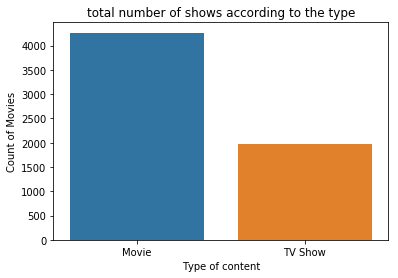

In [16]:
sns.countplot(df.type)
plt.xlabel("Type of content")
plt.ylabel("Count of Movies")
plt.title("total number of shows according to the type")
plt.show()

# USING PIE CHART TO INVESTIGATE THE TYPE OF CONTENT ON NETFLIX

,type,count
0,Movie,4265
1,TV Show,1969


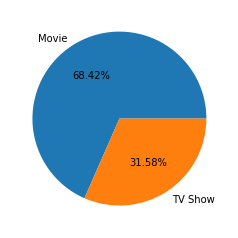

In [17]:
content_type = df['type'].value_counts().reset_index()
content_type.rename(columns = {'type': "count", 'index':'type'}, inplace = True)

plt.pie(content_type['count'], labels = content_type['type'], autopct = '%0.2f%%')
content_type


# NUMBER OF CONTENT RELEASED PER YEAR

In [18]:
df['release_year'].head(10)


0    2019
1    2016
2    2013
3    2016
4    2017
5    2016
6    2014
7    2017
8    2017
9    2014
Name: release_year, dtype: int64

In [19]:
from collections import Counter
released_year = Counter(df['release_year'])
released_year

#2018 has the highest number of content released

Counter({2019: 843,
         2016: 830,
         2013: 237,
         2017: 959,
         2014: 288,
         2015: 517,
         2009: 121,
         2012: 183,
         2010: 149,
         2018: 1063,
         2011: 136,
         2004: 49,
         2000: 31,
         1983: 9,
         1982: 11,
         2006: 68,
         2005: 63,
         2002: 38,
         1997: 31,
         2008: 107,
         2007: 71,
         2003: 43,
         1981: 7,
         1991: 15,
         1994: 14,
         1988: 13,
         1976: 7,
         1973: 9,
         1974: 8,
         1989: 11,
         1986: 10,
         1984: 8,
         1978: 7,
         1998: 26,
         1972: 4,
         1979: 7,
         1960: 4,
         1959: 1,
         2001: 34,
         1995: 17,
         1992: 16,
         1990: 15,
         1975: 5,
         1985: 8,
         1980: 7,
         1970: 1,
         1996: 17,
         1967: 3,
         1999: 21,
         1987: 5,
         1968: 4,
         1993: 19,
         2020: 25

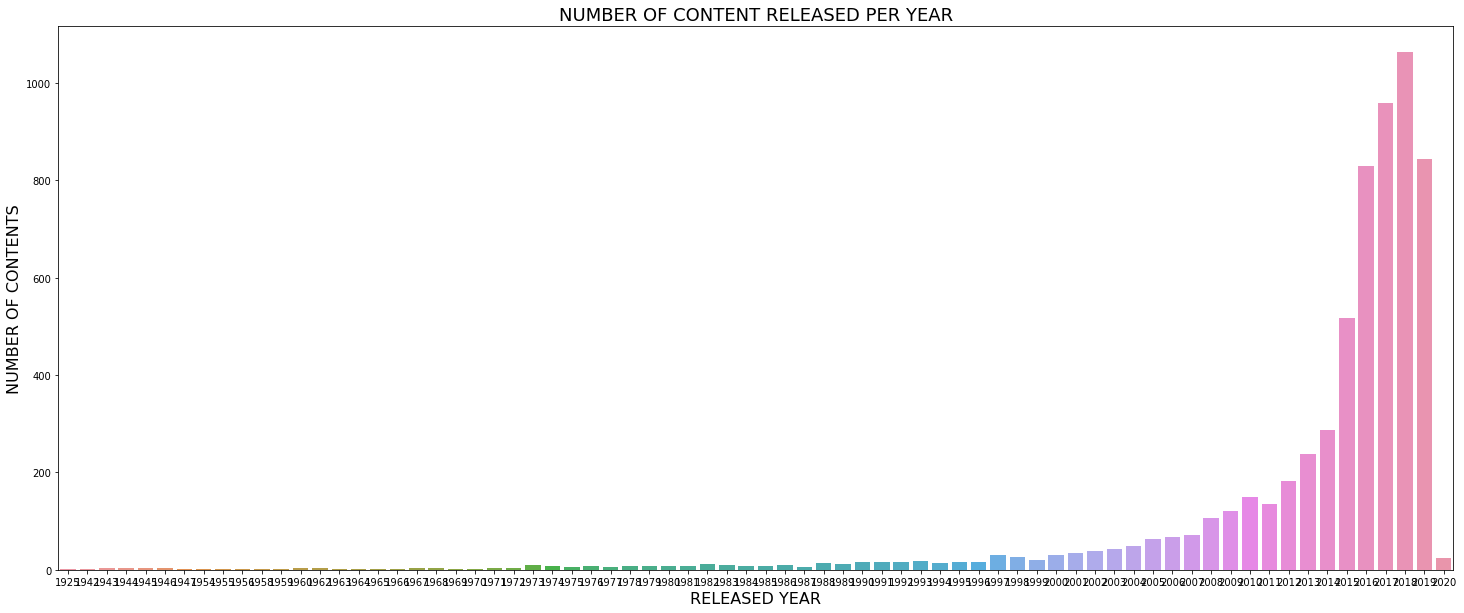

In [66]:
plt.figure(figsize = (25,10))
sns.countplot(df['release_year'])
plt.title('NUMBER OF CONTENT RELEASED PER YEAR', fontsize = 18)
plt.xlabel('RELEASED YEAR', fontsize = 16)
plt.ylabel('NUMBER OF CONTENTS', fontsize = 16)
plt.show()

TYPE OF CONTENTS ADDED PER YEAR

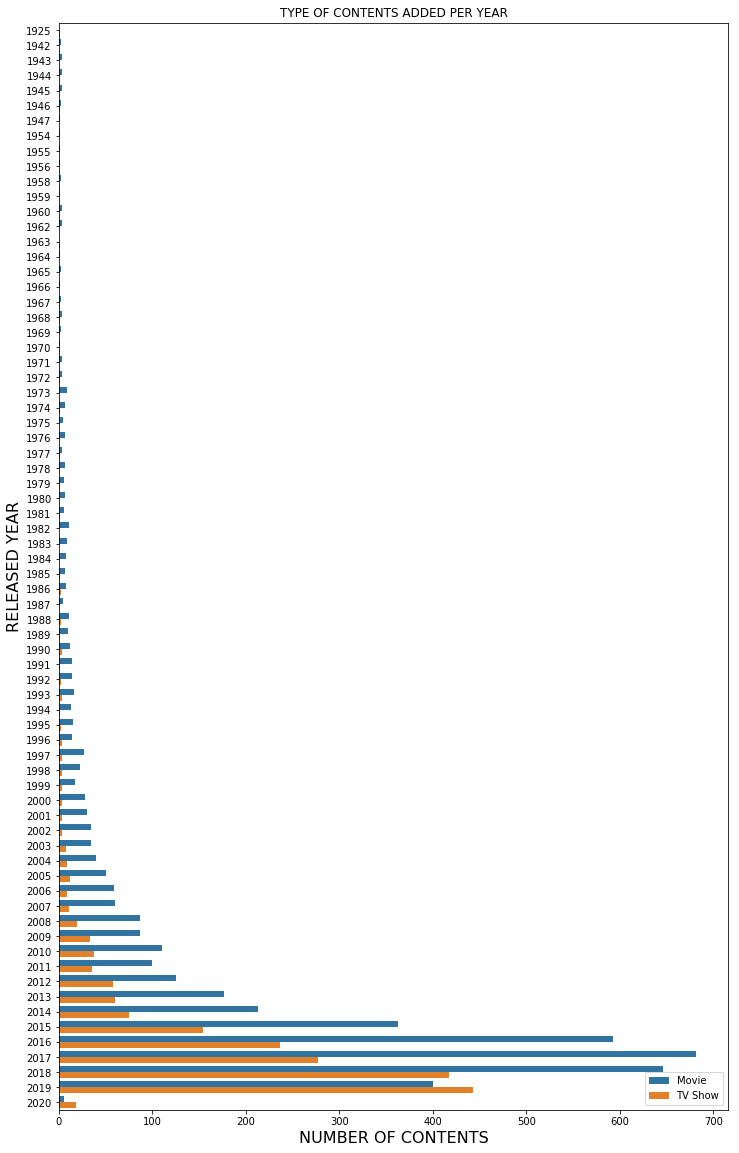

In [67]:
plt.figure(figsize = (12, 20))
sns.countplot(y = 'release_year', hue = 'type', data = df)
plt.title('TYPE OF CONTENTS ADDED PER YEAR')
plt.ylabel('RELEASED YEAR', fontsize = 16)
plt.xlabel('NUMBER OF CONTENTS', fontsize = 16)
plt.legend()

# Content growth throughout history

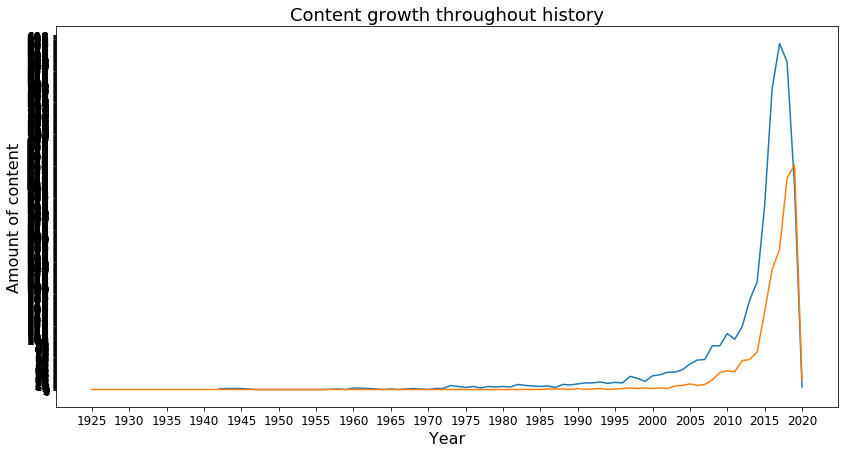

In [23]:
df_movie = df[df['type'] == 'Movie']
df_show = df[df['type'] == 'TV Show']
df_movie_table = df_movie['release_year'].value_counts().sort_index()
df_show_table = df_show['release_year'].value_counts().sort_index()

#plot the graph
plt.figure(figsize=(14,7))

plt.plot(df_movie_table.index, df_movie_table.values, label = 'Movies')
plt.plot(df_show_table.index, df_show_table.values, label = 'TV Shows')
plt.xticks(list(range(1925,2021,5)),fontsize=12)
plt.yticks(list(range(0,700)),fontsize=12)
plt.title('Content growth throughout history', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Amount of content', fontsize=16)



plt.show()

## There is an increase in the number of movies on Neflix than number of TV Shows. The growth in number of movies on netflix is much higher than that of TV shows.The graph shows that the growth in content on Neflix started from 2013. This increase contains different type of contents from different countries.

# RATINGS ON NETFLIX

In [25]:
rating = df.rating.value_counts()
rating

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

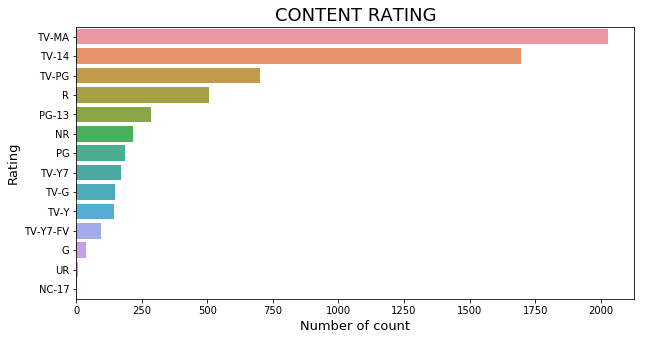

In [68]:
plt.figure(figsize = (10,5))
sns.barplot(x = rating.values, y = rating.index)
plt.ylabel('Rating', fontsize = 13)
plt.xlabel('Number of count', fontsize = 13)
plt.title('CONTENT RATING', fontsize = 18)

plt.show()

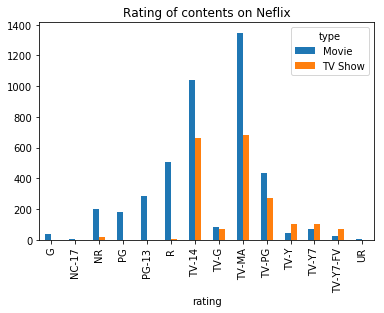

In [71]:
pd.crosstab(df.rating, df.type).plot(kind = 'bar')
plt.title('Rating of contents on Neflix')
plt.show()

# THE MONTH WITH THE HIGHEST CONTENTS

In [28]:
df['month_added'] = df.date_added.dt.month

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",9.0


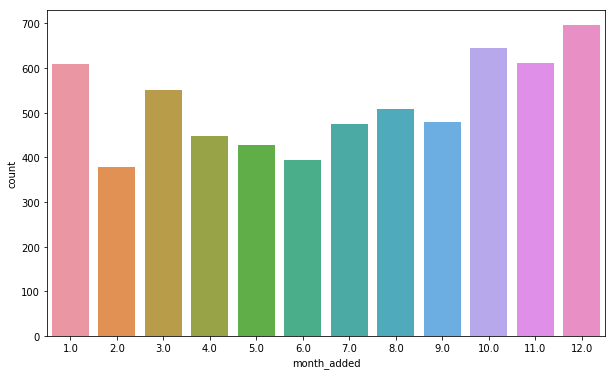

In [73]:
plt.figure(figsize = (10,6))
month = df['month_added'].value_counts().sort_index()
sns.countplot(df.month_added)
plt.show()

#Most contents were added in December

# OLDEST MOVIES ON NETFLIX

In [30]:
old_movie = df[df['type'] == 'Movie'][['title', 'release_year']].sort_values(by = 'release_year', ascending= True)

old_movie.head(7)


#The oldest movie on Netflix is "The Battle of Midway" and "Prelude to war", released in year 1942

,title,release_year
2013,The Battle of Midway,1942
2011,Prelude to War,1942
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2022,Undercover: How to Operate Behind Enemy Lines,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944


# OLDEST TV SHOW ON NETFLIX

In [31]:
df[df['type'] == 'TV Show'][['title','release_year']].sort_values(by = 'release_year', ascending = True).head(7)
#The oldest Tv Show on Netflix is "Pioneers: First Women Filmmakers, released in year 1925

,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
4079,Pioneers of African-American Cinema,1946
5981,The Twilight Zone (Original Series),1963
5980,The Andy Griffith Show,1967
5704,Star Trek,1968
614,Monty Python's Fliegender Zirkus,1972
5669,Monty Python's Flying Circus,1974


# AMOUNT OF CONTENT BY COUNTRY

In [32]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",9.0


In [74]:

country_num = df['country'].value_counts().head(10)
country_num

#USA has the highest number of contents released on Netflix

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: country, dtype: int64

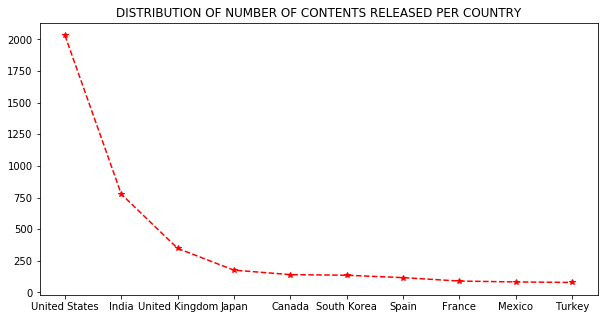

In [76]:
plt.figure(figsize = (10,5))
plt.plot(country_num, 'r--*')
plt.title('DISTRIBUTION OF NUMBER OF CONTENTS RELEASED PER COUNTRY')
plt.show()

# FIRST 3 COUNTRY TO RELEASE CONTENT ON NETFLIX

In [35]:
df[['country', 'release_year']].sort_values(by = 'release_year', ascending = True).dropna().head(30)



,country,release_year
2011,United States,1942
2013,United States,1942
2022,United States,1943
2023,United States,1943
2026,United States,1943
2017,United States,1944
2019,United States,1944
2021,"United States, United Kingdom",1944
2012,United States,1945
2009,United States,1945


# GETTING INSIGHT FROM CONTENTS FROM UNITED STATES

In [36]:
df_USA = df[df['country'] == 'United States']
df_USA

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",9.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,9.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,9.0
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",9.0
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,2017-09-08,2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,9.0
23,70304988,Movie,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,2017-09-08,2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f...",9.0
24,80057700,Movie,The Runner,Austin Stark,"Nicolas Cage, Sarah Paulson, Connie Nielsen, W...",United States,2017-09-08,2015,R,90 min,"Dramas, Independent Movies",A New Orleans politician finds his idealistic ...,9.0
25,80045922,Movie,6 Years,Hannah Fidell,"Taissa Farmiga, Ben Rosenfield, Lindsay Burdge...",United States,2015-09-08,2015,NR,80 min,"Dramas, Independent Movies, Romantic Movies",As a volatile young couple who have been toget...,9.0
31,80239639,Movie,Sierra Burgess Is A Loser,Ian Samuels,"Shannon Purser, Kristine Froseth, RJ Cyler, No...",United States,2018-09-07,2018,PG-13,106 min,"Comedies, Romantic Movies",A wrong-number text sparks a virtual romance b...,9.0
40,80058026,Movie,Hell and Back,"Tom Gianas, Ross R. Shuman","Nick Swardson, Mila Kunis, Bob Odenkirk, T.J. ...",United States,2018-09-06,2015,R,86 min,"Action & Adventure, Comedies, Independent Movies","When best friends break a blood oath, one of t...",9.0


# TYPE OF CONTENT RELEASED IN USA

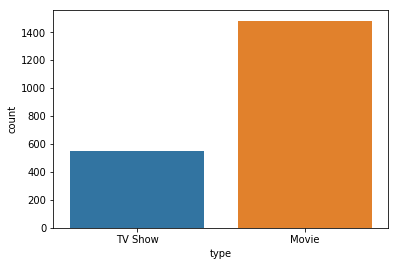

In [37]:
sns.countplot(df_USA.type)
plt.show()

In [38]:
df_USA['type'].value_counts()

#There 1482 and 550 movie and TV Show from USA respectively

Movie      1482
TV Show     550
Name: type, dtype: int64

# TOTAL NUMBER OF CONTENTS RELEASED IN USA

In [39]:
df_USA.shape

#There are 2032 contents released in USA

(2032, 13)

# WHAT YEAR HAS THE HIGHEST NUMBER OF CONTENT RELEASED IN USA?

In [41]:
df_USA['release_year'].value_counts().sort_values(ascending = False).head(5)

#2018 has the highest number contents

2018    355
2017    336
2019    324
2016    239
2015    132
Name: release_year, dtype: int64

# TYPE OF CONTENTS RELEASED IN USA PER YEAR

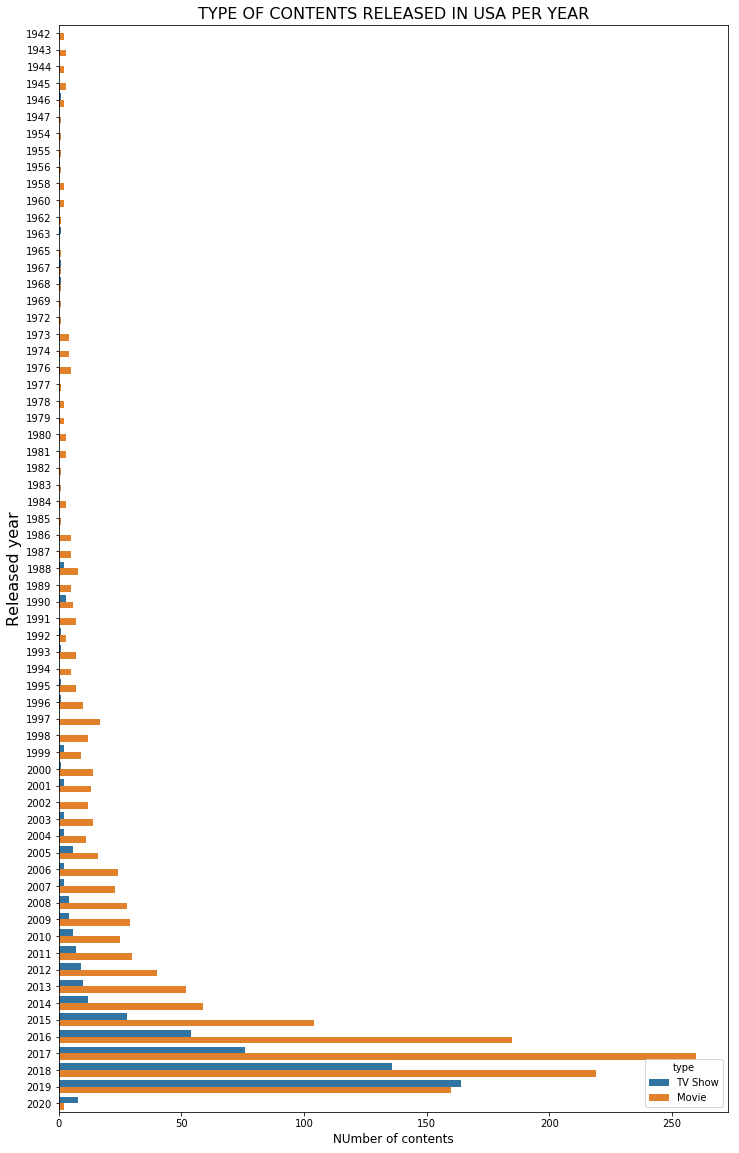

In [42]:
plt.figure(figsize = (12, 20))
sns.countplot(y = 'release_year', hue = 'type', data = df_USA)
plt.title('TYPE OF CONTENTS RELEASED IN USA PER YEAR', fontsize = 16)
plt.xlabel('NUmber of contents', fontsize = 12)
plt.ylabel('Released year', fontsize = 16)
plt.show()

# TOP TEN DIRECTOR WITH THE HIGHEST NUMBER OF CONTENTS IN USA

In [43]:
df_USA['director'].value_counts().head(10)

#Jay Kara has the highest nzumber of content in USA

Jay Karas           13
Jay Chapman         12
Marcus Raboy        12
Martin Scorsese      8
Ryan Polito          7
Shannon Hartman      7
Lance Bangs          7
Vlad Yudin           6
Troy Miller          5
Robert Rodriguez     5
Name: director, dtype: int64

# TOTAL NUMBER OF CONTENT RELEASED AT THE BEGINNING OF THE YEAR IN USA

In [48]:
#Filling the missing months with the mean of the month
df_USA['month_added'].fillna(round(df_USA['month_added'].mean()), inplace = True)
df_USA['month_added'].astype(int).head()
#df_USA['month_added'].isnull().sum()

2     9
3     9
4     9
8     9
20    9
Name: month_added, dtype: int32

In [77]:
df_USA[df_USA['month_added'] == 1]['month_added'].value_counts()
#There are 238 contents added in January

1.0    238
Name: month_added, dtype: int64

# NUMBER OF CONTENTS RELEASED IN USA PER MONTH

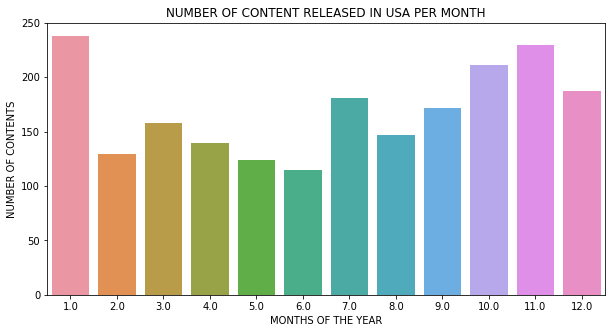

In [46]:
plt.figure(figsize = (10,5))
sns.countplot(df_USA['month_added'])
plt.title('NUMBER OF CONTENT RELEASED IN USA PER MONTH')
plt.xlabel('MONTHS OF THE YEAR')
plt.ylabel('NUMBER OF CONTENTS')
plt.show()

#January has the highest number of contents released per month in USA

# TYPE OF CONTENTS RELEASED  PER MONTH IN USA

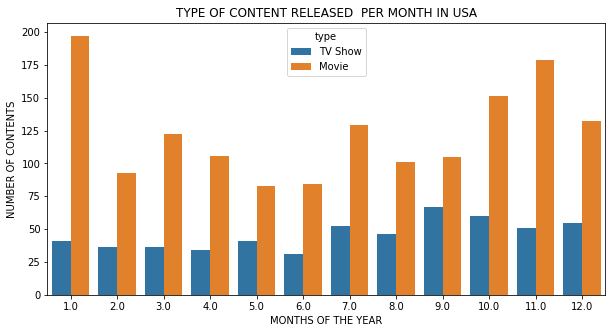

In [47]:
plt.figure(figsize = (10,5))
sns.countplot(df_USA['month_added'], hue = df_USA['type'])
plt.title('TYPE OF CONTENT RELEASED  PER MONTH IN USA')
plt.xlabel('MONTHS OF THE YEAR')
plt.ylabel('NUMBER OF CONTENTS')
plt.show()

#January has the highest number of Movie while September has the highest number of TV Show